In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import scipy as sp
import itertools
from functools import reduce
import seaborn as sns; sns.set()

In [3]:
features = pd.read_csv('../data/feature_dataframes/2019-03-21_11:28:18.csv')
features['track_name'] = features['track_name'].apply(lambda x: x[3:].split('.')[0])
del features['Unnamed: 0']
features.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,track_name
0,3014670.8,3226511.0,2437922.5,225743.28,-1.0,-1.0,-1.000,575931.70,223003.190,65127.336,...,17.113045,4.806586,-0.067815,18.098577,17.894306,-0.985383,5.946620,12.635537,41.378174,In Bed Flying
1,2270490.8,1333711.4,3528831.0,885750.30,-1.0,-1.0,-1.000,1074946.50,-1.000,1070559.400,...,24.084652,5.944289,0.267877,20.389080,23.899880,-0.974069,7.319490,10.237419,43.387790,Albatross
2,1658229.5,1107043.2,995609.8,827145.50,-1.0,-1.0,-1.000,398089.94,30713.025,623992.060,...,6.711153,3.625670,-0.313312,12.432811,10.557815,-0.990510,3.698605,11.774317,28.647226,ITEYBC
3,1176145.8,1104262.1,1679923.2,-1.00,-1.0,-1.0,23781.238,509908.60,6387.089,17066.305,...,20.747921,5.119430,0.046033,18.750399,20.324224,-0.972095,5.617457,11.719130,32.148050,Heist Huzzle
4,1944218.4,1670096.4,1394698.6,-1.00,-1.0,133755.3,838256.900,550950.90,397942.800,-1.000,...,11.376924,4.278834,-0.171246,14.583193,13.398557,-0.989856,5.079335,11.464811,34.010260,All The Night


In [4]:
tags_df = pd.read_csv('../data/Music_Genres_Moods_Tags.csv', header=0)
tags_df.head()

,,Song Name,Genre,Genre ID,Mood/Category,Mood/Category ID,Tags,Epidemic Genre (if applicable),Epidemic Mood (If applicable)
0,0b7c952d-742a-4705-8ea0-0be5f90ce495,Origami,Electronic/Synth,4,"Upbeat, Chill","13, 1",#percussion #house #perc #rhythmic #chillparty,Electronica & Dance:Deep House,"Dreamy,Hopeful"
1,b475542d-d3f3-432b-b37c-a7d2e3646351,Columbus Circle,Electronic/Synth,4,"Chill, Groovy","1, 7",#dreamy #runway #house #trippy,Electronica & Dance:Deep House,"Epic,Chasing"
2,15ebd3d2-c1f1-4592-bf63-13d97804d759,Moonrise,Ambient,2,"Dreamy, Slow","3, 11",#dramatic #moving #touching,"Film:Mystery,Nostalgia","Floating,Peaceful"
3,e23f9615-58d4-4cf6-a2b2-01079117be22,Drummy Dubby Steps 2,Electronic/Synth,4,Weird/Eccentric,14,#techno #drums #adventure,Electronica & Dance:Beats,Mysterious
4,9c4fcdec-afdf-4081-9ca8-d7df5d0caf63,Outside Circle,"Hip-Hop, Electronic/Synth","6, 4",Chill,1,#trap #smooth #driving,"Hip Hop:Alternative Hip Hop,Trap","Dark,Dreamy"


In [5]:
data = features.merge(tags_df[['Song Name', 'Genre ID', 'Mood/Category ID', 'Tags']], left_on='track_name', right_on='Song Name')
#labels = data[['Genre ID', 'Mood/Category ID']].apply(lambda x: x[0]+', '+x[1], axis=1)
labels = data['Mood/Category ID'].astype(str)
labels_2 = data['Tags'].apply(lambda s: [x[1:] for x in s.split(' ')])


del data['Genre ID'], data['Mood/Category ID']
names = data['Song Name']
del data['Song Name'], data['track_name'], data['Tags']
data.head()

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,3014670.8,3226511.0,2437922.5,225743.28,-1.0,-1.0,-1.000,575931.70,223003.190,65127.336,...,39.872700,17.113045,4.806586,-0.067815,18.098577,17.894306,-0.985383,5.946620,12.635537,41.378174
1,2270490.8,1333711.4,3528831.0,885750.30,-1.0,-1.0,-1.000,1074946.50,-1.000,1070559.400,...,43.120804,24.084652,5.944289,0.267877,20.389080,23.899880,-0.974069,7.319490,10.237419,43.387790
2,1658229.5,1107043.2,995609.8,827145.50,-1.0,-1.0,-1.000,398089.94,30713.025,623992.060,...,34.749737,6.711153,3.625670,-0.313312,12.432811,10.557815,-0.990510,3.698605,11.774317,28.647226
3,1176145.8,1104262.1,1679923.2,-1.00,-1.0,-1.0,23781.238,509908.60,6387.089,17066.305,...,37.003994,20.747921,5.119430,0.046033,18.750399,20.324224,-0.972095,5.617457,11.719130,32.148050
4,1944218.4,1670096.4,1394698.6,-1.00,-1.0,133755.3,838256.900,550950.90,397942.800,-1.000,...,40.539820,11.376924,4.278834,-0.171246,14.583193,13.398557,-0.989856,5.079335,11.464811,34.010260


In [6]:
labels.head()

0           2
1      14, 13
2    1, 11, 9
3          13
4           3
Name: Mood/Category ID, dtype: object

In [7]:
labels_2.head()

0                        [trap, fire, rapbeats, claps]
1                          [videogames, dubstep, 8bit]
2                  [vocals, trap, sadboi, sadboymusic]
3                      [miscellaneous, action, sports]
4    [sleepy, mysterious, trippy, alternative, vocals]
Name: Tags, dtype: object

In [8]:
tags = {
    1 : 'Chill',
    2: 'Dark',
    3: 'Dreamy',
    4: 'Eerie',
    5: 'Epic', 
    6: 'Funny',
    7: 'Groovy/Funk',
    8: 'Happy',
    9: 'Melancholy',
    10: 'Romantic/Sexy',
    11: 'Slow', 
    12: 'Suspense', 
    13: 'Upbeat', 
    14: 'Weird', 
    #15: 'Acoustic',
    #16: 'Ambient',
    #17: 'Classical', 
    #18: 'Electronic/Synth',
    #19: 'Film Score', 
    #20: 'Hip Hop/R&B', 
    #21: 'Jazz',
    #22: 'Latin',
    #23: 'Pop',
    #24: 'Rock',
    #25: 'Soul'
}


In [9]:
#Completing the tag dict with the tags from the Tags column
offset = max(tags.keys()) + 1
tags_list = list(set(reduce(lambda x,y: x+y, labels_2)))
tags_list = [x for x in tags_list if x is not '']
for i, tag in enumerate(tags_list):
    tags[i + offset] = tag
tags


{1: 'Chill',
 2: 'Dark',
 3: 'Dreamy',
 4: 'Eerie',
 5: 'Epic',
 6: 'Funny',
 7: 'Groovy/Funk',
 8: 'Happy',
 9: 'Melancholy',
 10: 'Romantic/Sexy',
 11: 'Slow',
 12: 'Suspense',
 13: 'Upbeat',
 14: 'Weird',
 15: 'bubbly',
 16: 'cinematic',
 17: 'romantic',
 18: 'dreampop',
 19: 'dark',
 20: 'content',
 21: 'nightlife',
 22: 'electro-pop',
 23: 'happy',
 24: 'hard',
 25: 'carnival',
 26: 'rapbeats',
 27: 'superhero',
 28: 'sand',
 29: 'dancefloor',
 30: 'whistle',
 31: 'rave',
 32: 'trippy',
 33: 'outdoors',
 34: 'rhythmic',
 35: 'lofi',
 36: 'oldschool',
 37: 'intense',
 38: 'gloomy',
 39: 'groovy',
 40: '80s',
 41: 'upbeat',
 42: 'sneaky',
 43: 'waves',
 44: 'fire',
 45: 'spanish',
 46: 'dubstep',
 47: 'sadboi',
 48: 'hardcore',
 49: 'action',
 50: 'vlog',
 51: 'trumpet',
 52: 'angst',
 53: 'terminator',
 54: 'adventure',
 55: 'asia',
 56: 'justintimberlake',
 57: 'sexy',
 58: 'lonely',
 59: 'vintage',
 60: 'workout',
 61: 'chill',
 62: 'mysterious',
 63: 'energy',
 64: 'celebration'

In [10]:
reverse_tags = {}
for k, v in tags.items():
    reverse_tags[v] = k
reverse_tags

{'Chill': 1,
 'Dark': 2,
 'Dreamy': 3,
 'Eerie': 4,
 'Epic': 5,
 'Funny': 6,
 'Groovy/Funk': 7,
 'Happy': 8,
 'Melancholy': 9,
 'Romantic/Sexy': 10,
 'Slow': 11,
 'Suspense': 12,
 'Upbeat': 13,
 'Weird': 14,
 'bubbly': 15,
 'cinematic': 16,
 'romantic': 17,
 'dreampop': 18,
 'dark': 19,
 'content': 20,
 'nightlife': 21,
 'electro-pop': 22,
 'happy': 23,
 'hard': 24,
 'carnival': 25,
 'rapbeats': 26,
 'superhero': 27,
 'sand': 28,
 'dancefloor': 29,
 'whistle': 30,
 'rave': 31,
 'trippy': 32,
 'outdoors': 33,
 'rhythmic': 34,
 'lofi': 35,
 'oldschool': 36,
 'intense': 37,
 'gloomy': 38,
 'groovy': 39,
 '80s': 40,
 'upbeat': 41,
 'sneaky': 42,
 'waves': 43,
 'fire': 44,
 'spanish': 45,
 'dubstep': 46,
 'sadboi': 47,
 'hardcore': 48,
 'action': 49,
 'vlog': 50,
 'trumpet': 51,
 'angst': 52,
 'terminator': 53,
 'adventure': 54,
 'asia': 55,
 'justintimberlake': 56,
 'sexy': 57,
 'lonely': 58,
 'vintage': 59,
 'workout': 60,
 'chill': 61,
 'mysterious': 62,
 'energy': 63,
 'celebration': 64

In [11]:
labels_full = labels_2.apply(lambda l: ', '.join([str(reverse_tags[x]) for x in l if x is not '']))
labels_full = (labels + ', ').add(labels_full)
labels_full.head()

0            2, 177, 44, 26, 121
1           14, 13, 163, 46, 104
2    1, 11, 9, 189, 177, 47, 138
3                13, 120, 49, 77
4        3, 145, 62, 32, 94, 189
dtype: object

## Histogram of tags

<Figure size 2880x720 with 0 Axes>

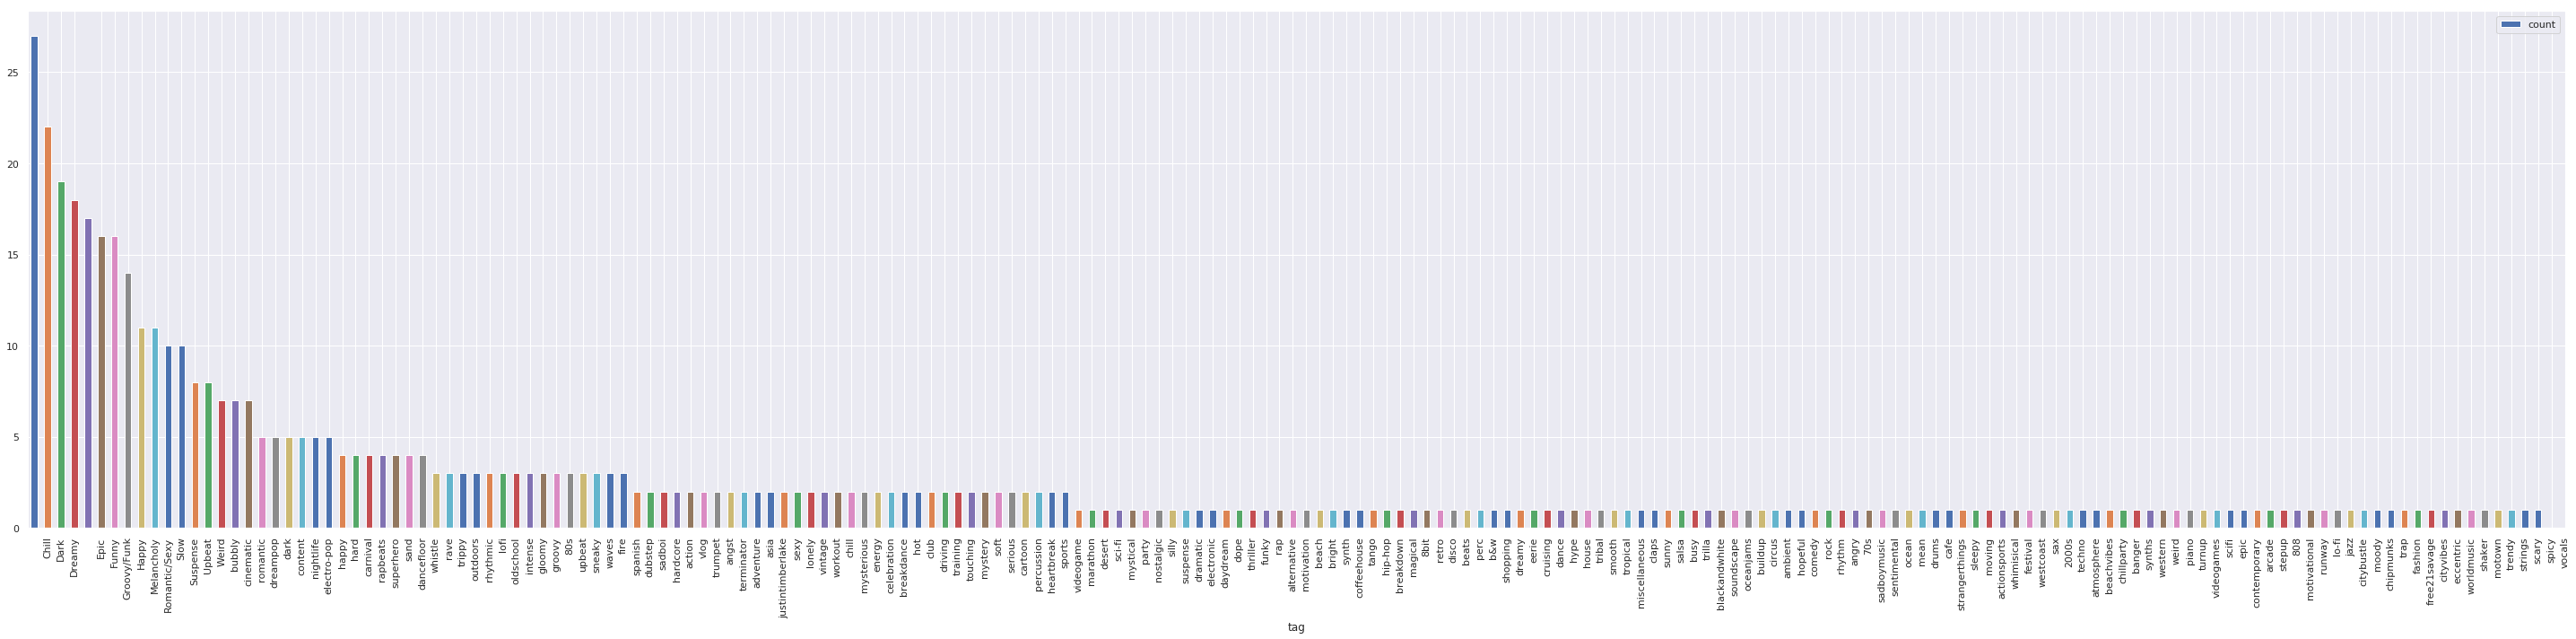

In [52]:
concat = pd.DataFrame([int(x) for x in reduce(lambda x, y: x +', '+ y, labels_full).split(', ')], columns=['tag'])
concat['count'] = 0
counts = concat.groupby('tag')['count'].count().reset_index()
counts = counts.sort_values(by=['count'], ascending=False)
plt.figure(figsize=(40,10))
#plt.bar(counts['tag'], counts['count'])
counts.plot.bar(x='tag', y='count', figsize=(40,10))
ticks = [ tags[x] for x in counts['tag']]
plt.xticks(counts['tag'], ticks, rotation='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.tight_layout()
plt.savefig('../imgs/histogram_of_tags.png')

In [50]:
#the 2 missing tags 
tags[13], tags[114]

('Upbeat', 'dance')

## Cooccurence matrix of tags

In [43]:
permutations = reduce(lambda x, y: x+y, [list(itertools.permutations([int(y)-1 for y in x.split(',')], 2)) for x in labels_full ])
permutations = pd.DataFrame(permutations, columns=['left', 'right'])
permutations['count'] = 0
permutations.head()

,left,right,count
0,1,176,0
1,1,43,0
2,1,25,0
3,1,120,0
4,176,1,0


In [44]:
cooccurences = permutations.groupby(['left', 'right'])['count'].count().reset_index()
cooccurences.head()

,left,right,count
0,0,2,7
1,0,6,1
2,0,7,1
3,0,8,2
4,0,10,3


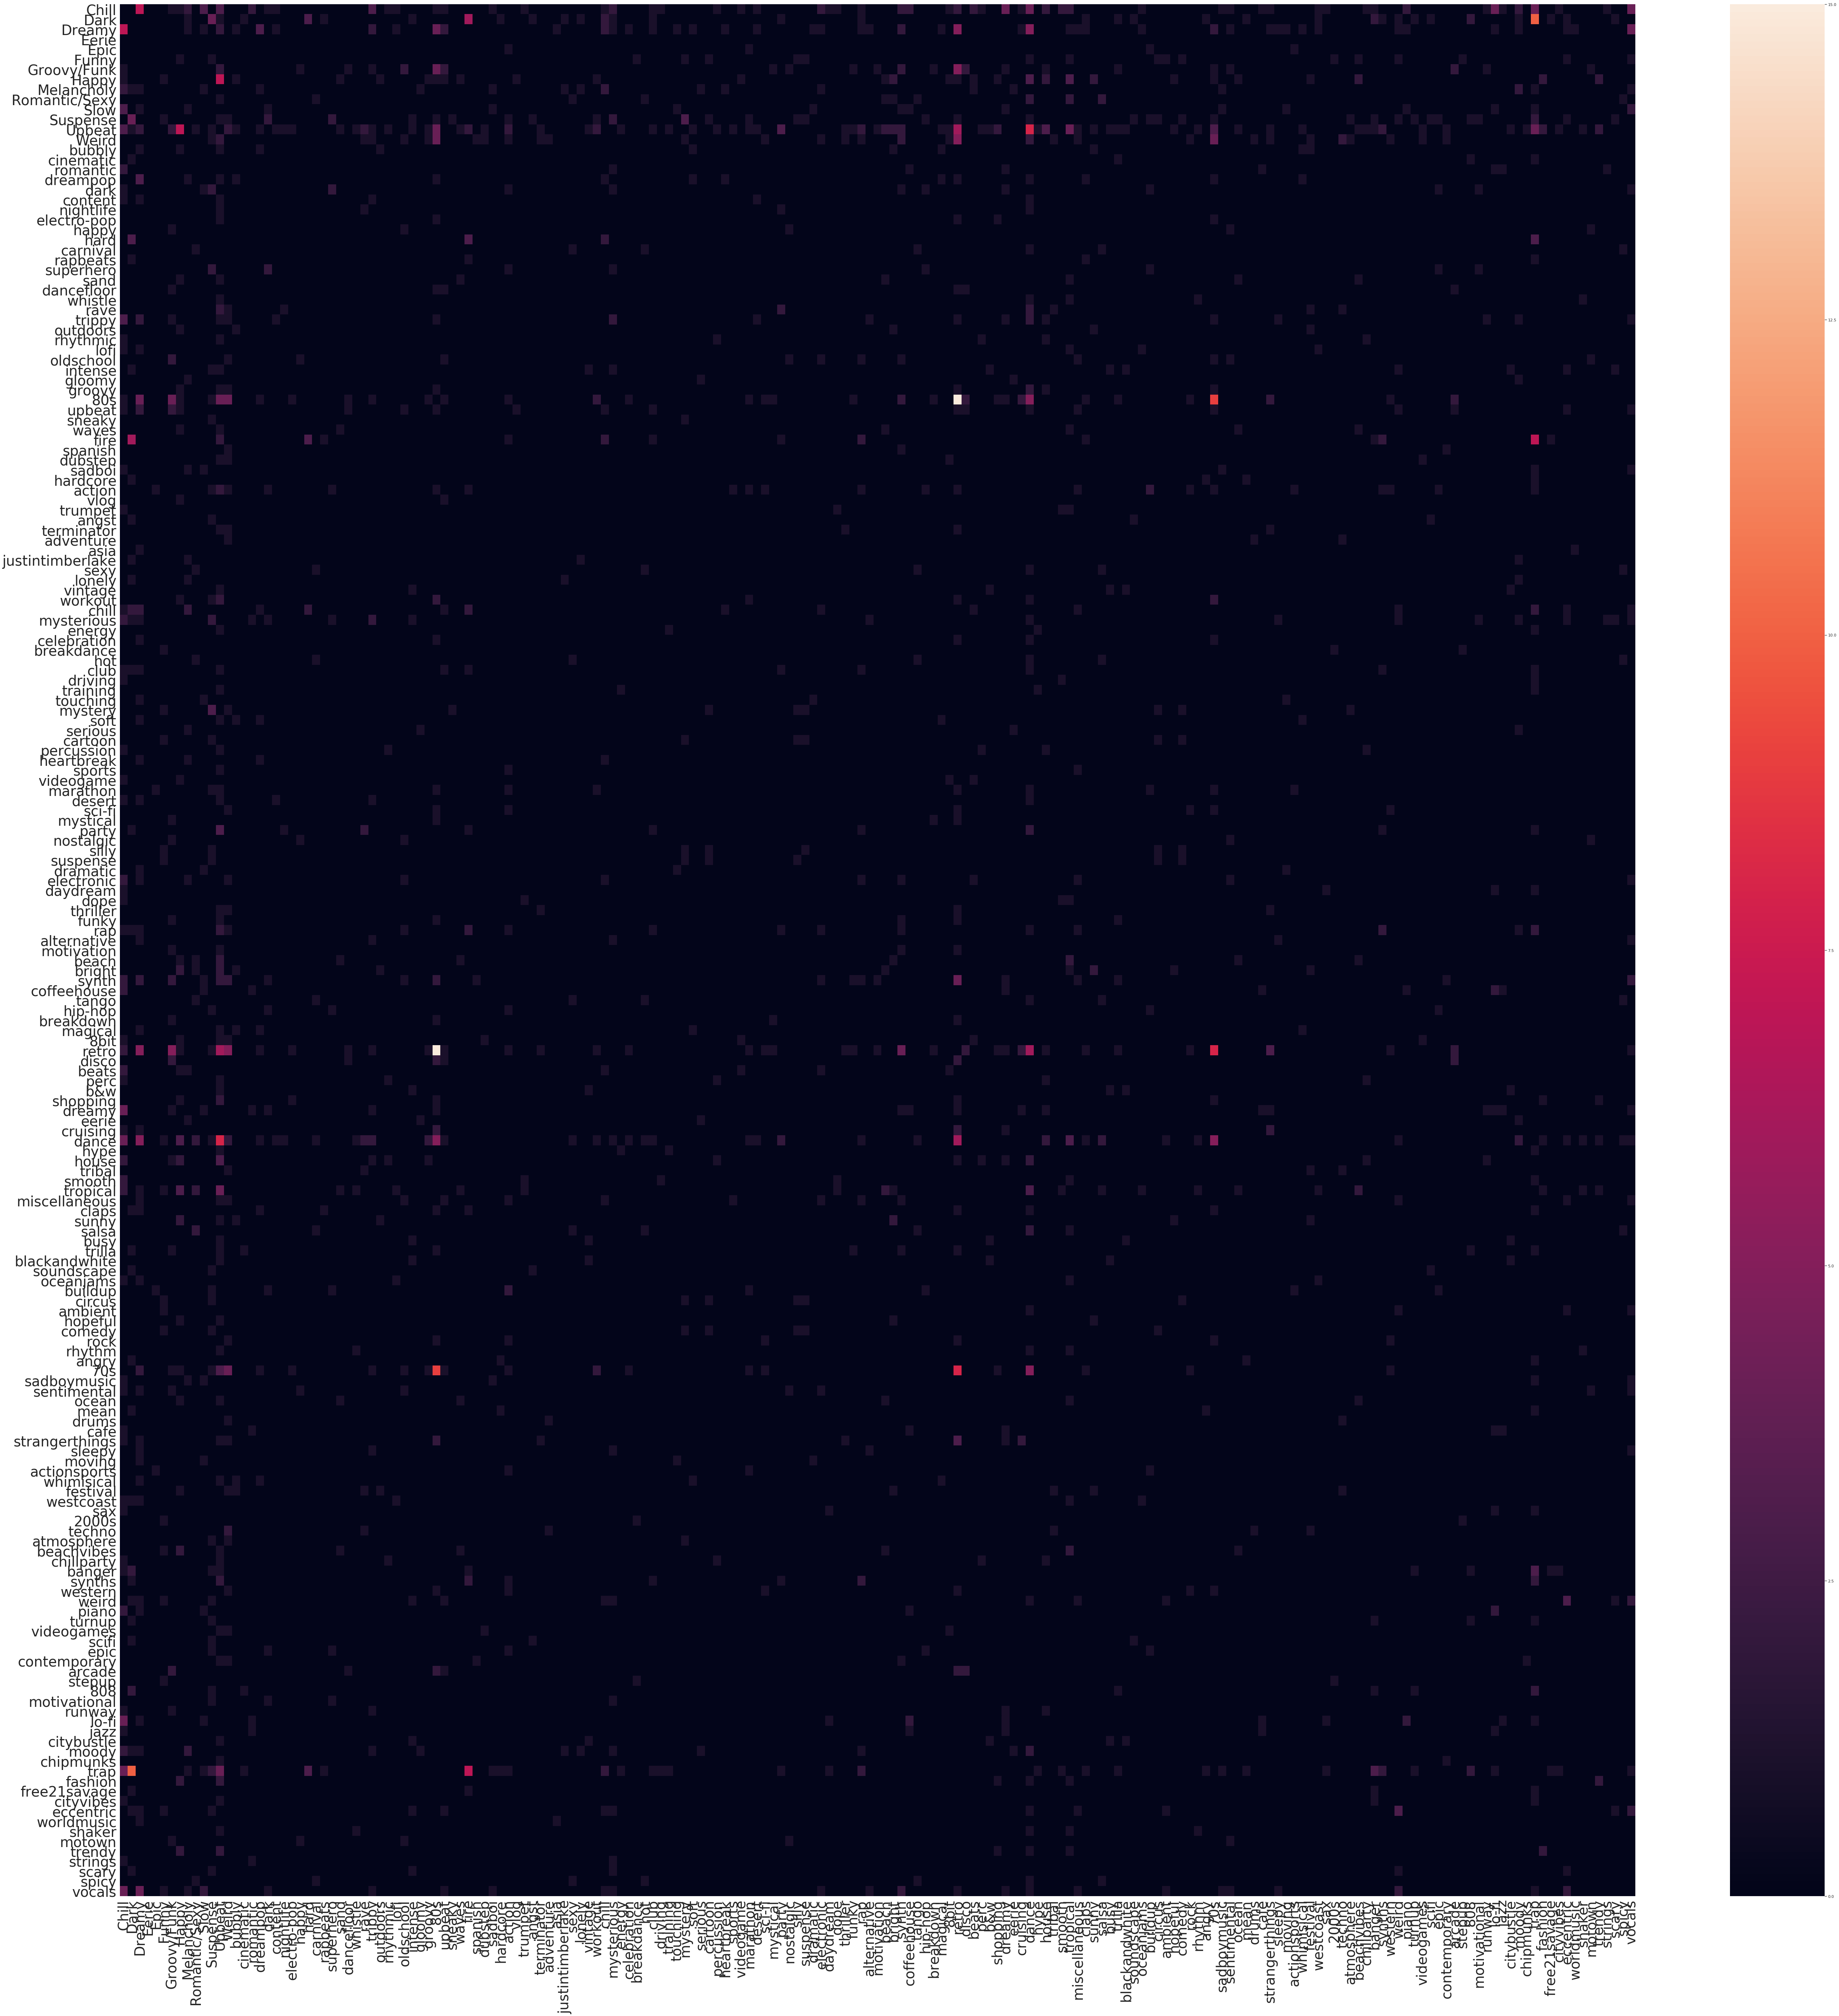

In [45]:
c_matrix = sp.sparse.csr_matrix((list(cooccurences['count']), (list(cooccurences['left']), cooccurences['right']))).todense()
fig, ax = plt.subplots(figsize=(80,80)) 
ax = sns.heatmap(c_matrix, ax=ax)
ax.tick_params(labelsize=40)
ax.set_xticklabels(labels=tags.values(), rotation=90)
ax.set_yticklabels(labels=tags.values(), rotation=0)
plt.tight_layout()

## tSNE plots

In [7]:
def compute_mask(tag_id, serie):
    l = [[int(y) for y in x.split(',')] for x in serie ]
    res = [tag_id in x for x in l]
    return res

mask = compute_mask(4, labels)


In [63]:
def tSNE_plot(data, labels, tag_id, layer_id):
    
    
    # indices of the features for each layer
    idx_dict = {}
    for i in range(5):
        idx_dict[i+1] = [str(x) for x in list(range(32*i, 32*(i+1)))]
    
    mask = compute_mask(tag_id, labels)
    if layer_id not in idx_dict.keys():
        features_list = list(data.columns)
        title = 'tSNE with concatenated features from all the layers'
    else:
        features_list = idx_dict[layer_id]
        title = f'tSNE with features from layer {layer_id}'
    
    pca = PCA(n_components=30)
    pca_features = pca.fit_transform(data[features_list])
    
    tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(pca_features)
    tx, ty = tsne[:,0], tsne[:,1]
    tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))
    
    plt.figure(figsize=(20,10))
    plt.scatter(tx[mask], ty[mask], color='g')
    plt.scatter(tx[[not x for x in mask]], ty[[not x for x in mask]], color='r')
    for i, name in enumerate(names):
        plt.annotate(name, (tx[i], ty[i]))
        
    plt.title(title)
        

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 95 samples in 0.000s...
[t-SNE] Computed neighbors for 95 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 95 / 95
[t-SNE] Mean sigma: 808133.288967
[t-SNE] Computed conditional probabilities in 0.017s
[t-SNE] Iteration 50: error = 56.7515221, gradient norm = 0.5262317 (50 iterations in 0.023s)
[t-SNE] Iteration 100: error = 55.3432503, gradient norm = 0.6325514 (50 iterations in 0.026s)
[t-SNE] Iteration 150: error = 55.0960121, gradient norm = 0.7044500 (50 iterations in 0.019s)
[t-SNE] Iteration 200: error = 59.8880539, gradient norm = 0.5638025 (50 iterations in 0.014s)
[t-SNE] Iteration 250: error = 58.2179909, gradient norm = 0.5868527 (50 iterations in 0.015s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.217991
[t-SNE] Iteration 300: error = 0.8529506, gradient norm = 0.0108877 (50 iterations in 0.015s)
[t-SNE] Iteration 350: error = 0.7363811, gradient norm = 0.0015287 

[t-SNE] Iteration 200: error = 53.2990417, gradient norm = 0.6949999 (50 iterations in 0.016s)
[t-SNE] Iteration 250: error = 56.7206535, gradient norm = 0.5855926 (50 iterations in 0.015s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.720654
[t-SNE] Iteration 300: error = 0.5838455, gradient norm = 0.0162370 (50 iterations in 0.015s)
[t-SNE] Iteration 350: error = 0.3669578, gradient norm = 0.0014924 (50 iterations in 0.014s)
[t-SNE] Iteration 400: error = 0.3494765, gradient norm = 0.0004489 (50 iterations in 0.014s)
[t-SNE] Iteration 450: error = 0.3063394, gradient norm = 0.0021783 (50 iterations in 0.014s)
[t-SNE] Iteration 500: error = 0.2777922, gradient norm = 0.0015457 (50 iterations in 0.014s)
[t-SNE] Iteration 550: error = 0.2535839, gradient norm = 0.0014649 (50 iterations in 0.014s)
[t-SNE] Iteration 600: error = 0.2478525, gradient norm = 0.0009950 (50 iterations in 0.014s)
[t-SNE] Iteration 650: error = 0.2464567, gradient norm = 0.0022599 (50 it

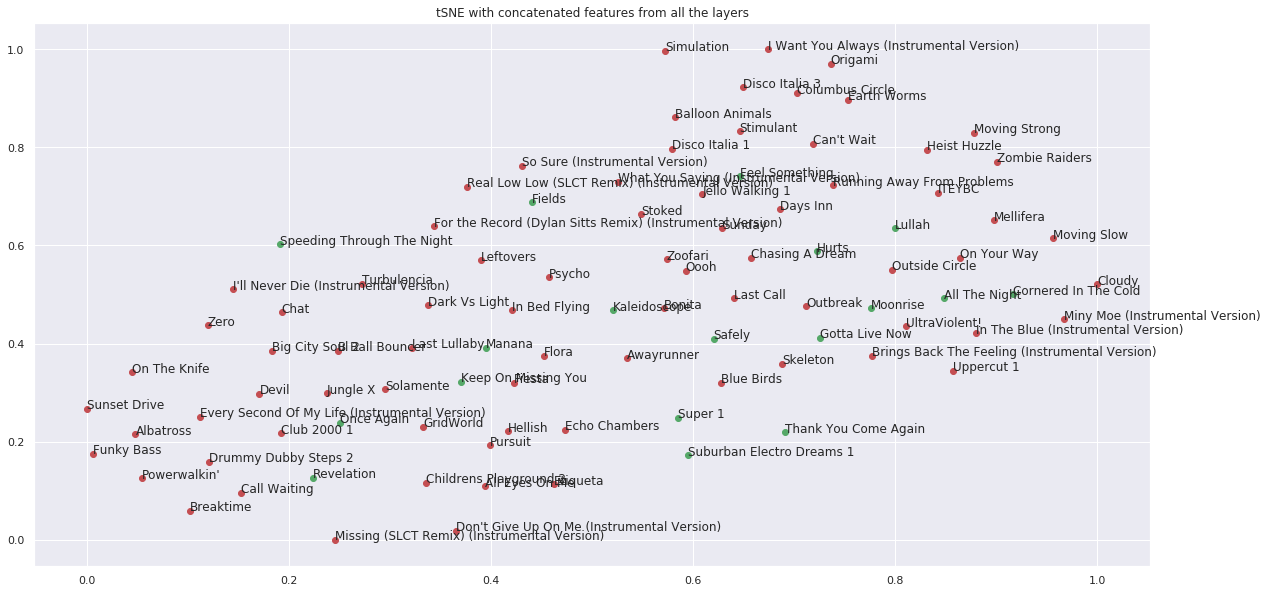

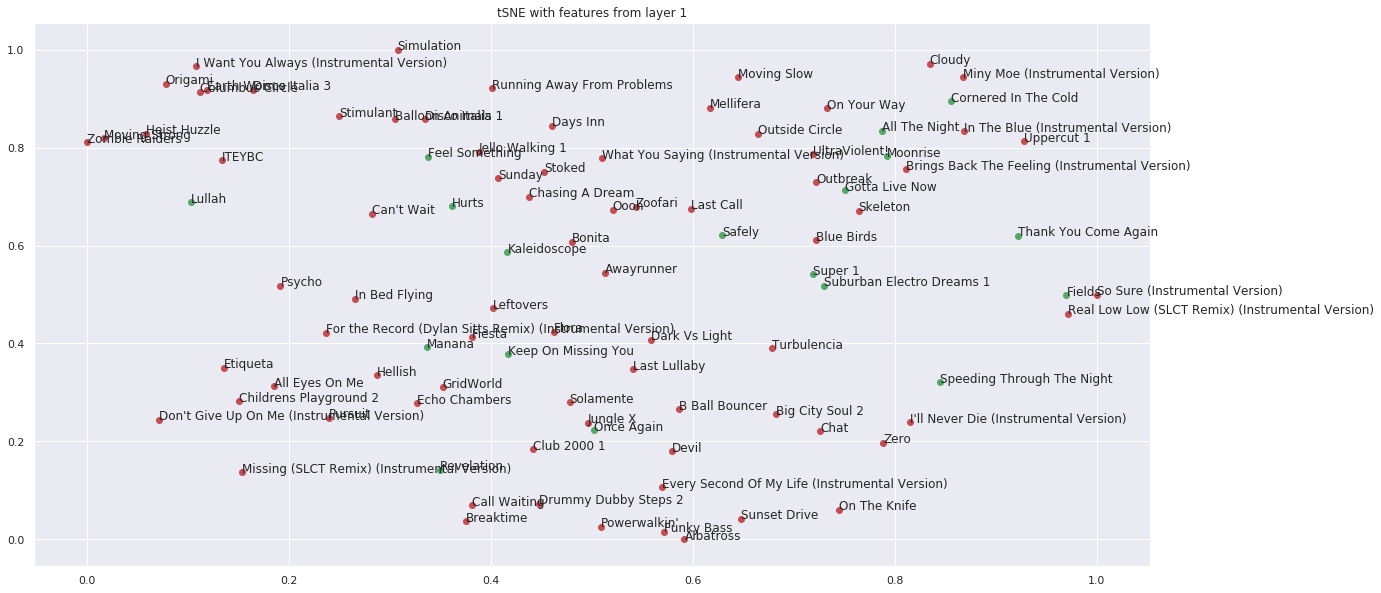

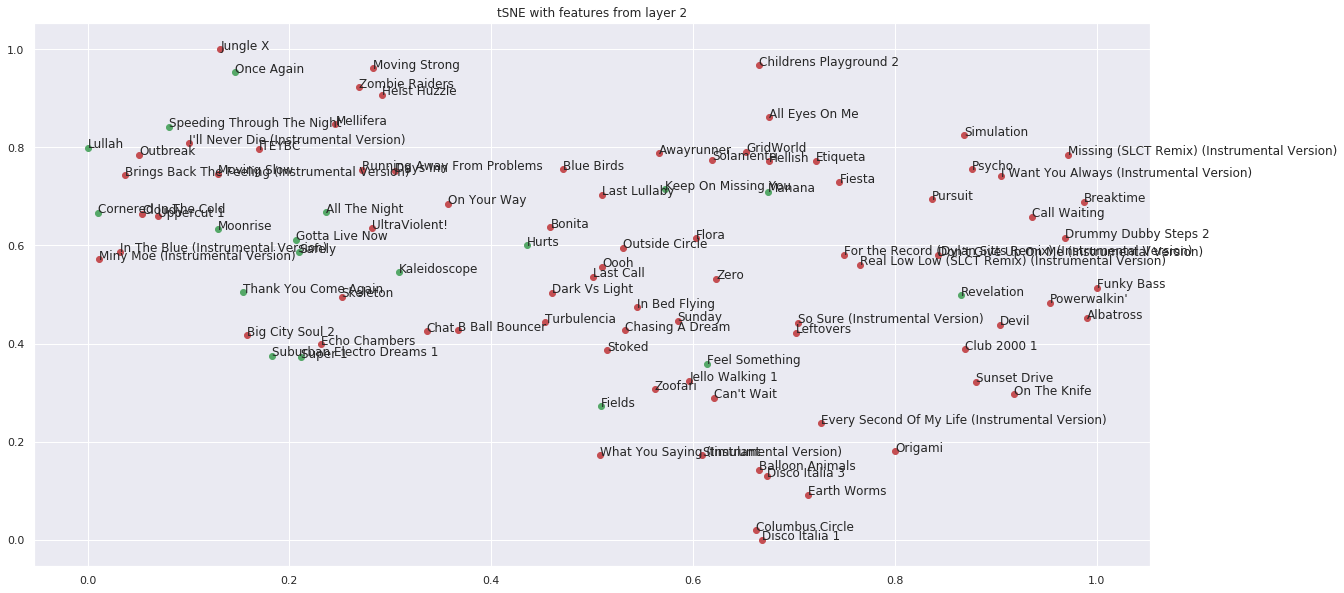

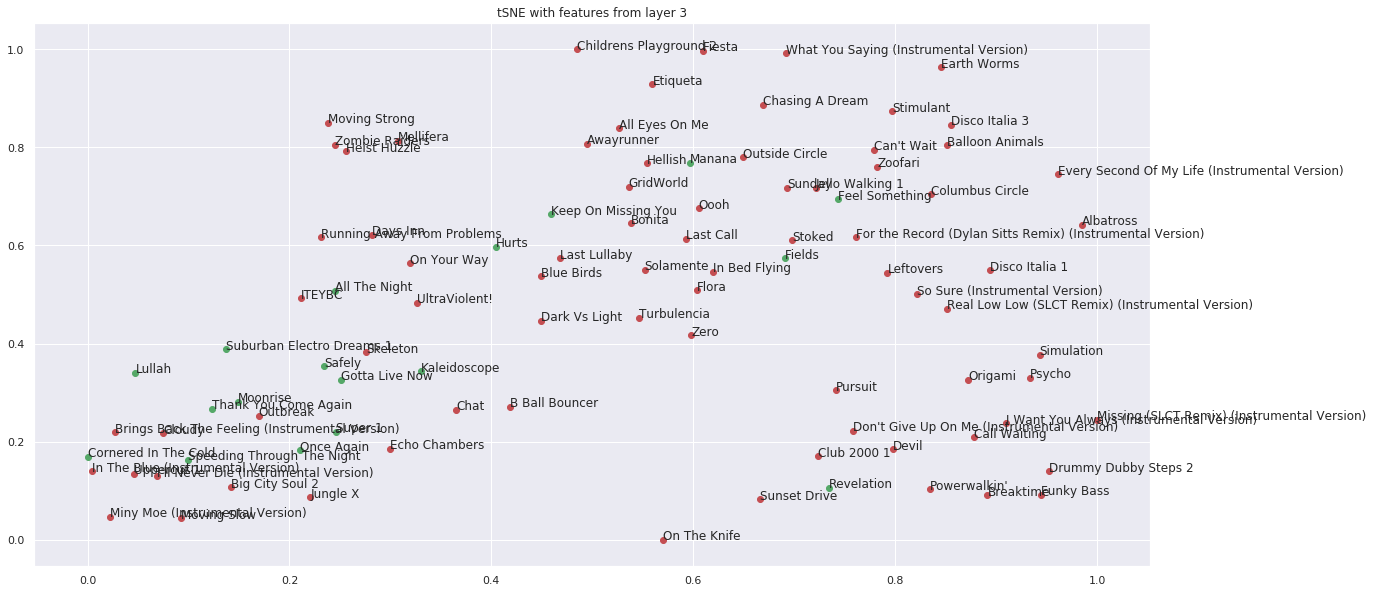

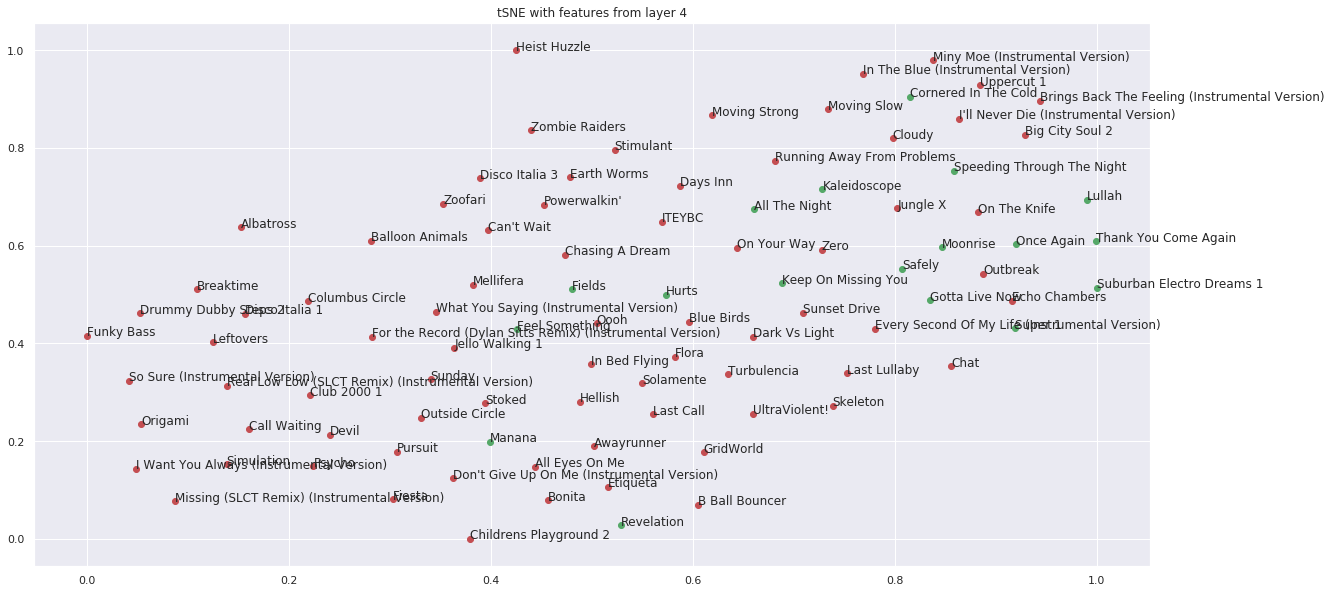

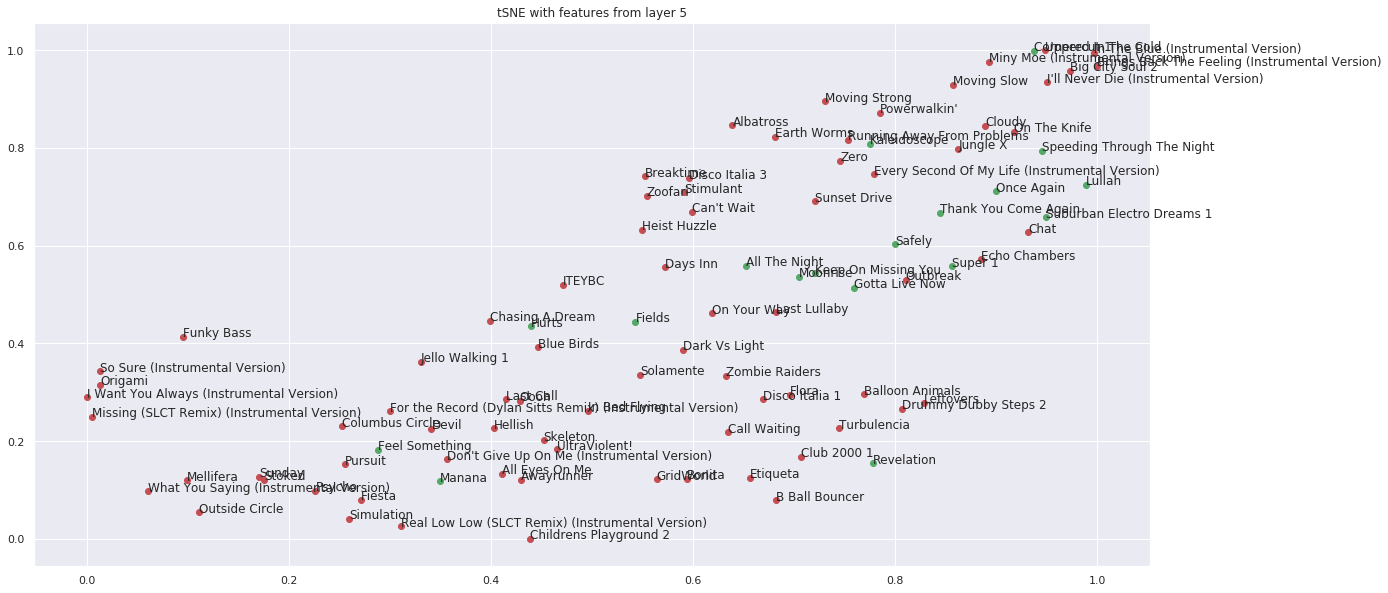

In [66]:
tag_id = 3
for i in range(6):
    tSNE_plot(data, labels, tag_id, layer_id=i)

133